In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("kc-house-data.csv", encoding="latin-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


ЗАДАЧА 1

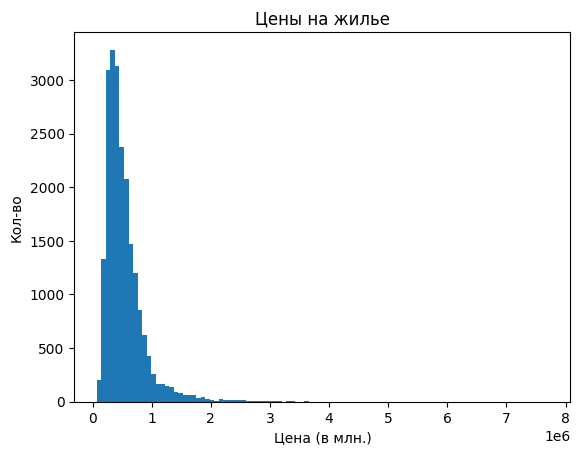

In [4]:
plt.hist(df['price'], bins=100)
plt.xlabel("Цена (в млн.)")
plt.ylabel("Кол-во")
plt.title("Цены на жилье");

Из данной гистограммы распределения цен можно сделать вывод, что участки стоят в среднем от полумиллиона, а подавляющее количество участков не стоят дороже миллиона.

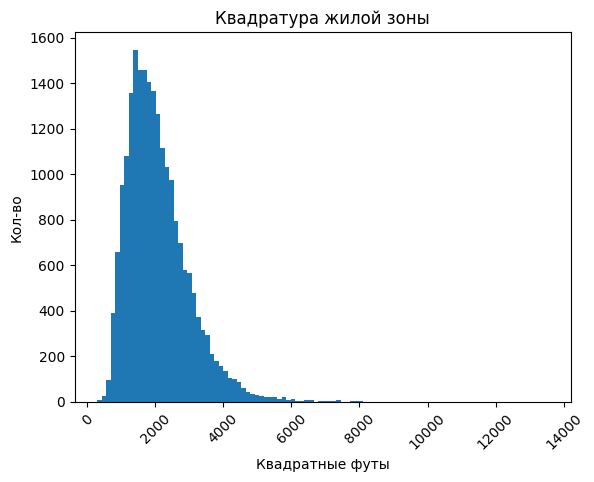

In [5]:
plt.hist(df['sqft_living'], bins=100)
plt.xticks(rotation=45)
plt.xlabel("Квадратные футы")
plt.ylabel("Кол-во")
plt.title("Квадратура жилой зоны");

Из данной гистограммы распределения квадратуры жилой зоны можно сделать вывод, что участки имеют квадратуру в среднем от 1000 до 3000 кв. футов.

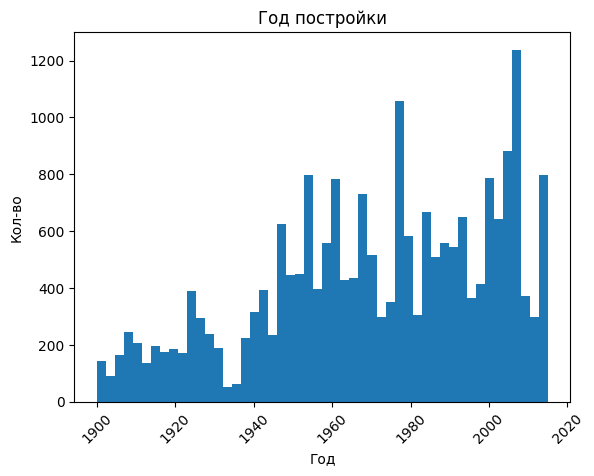

In [37]:
plt.hist(df['yr_built'], bins=50)
plt.xticks(rotation=45)
plt.xlabel("Год")
plt.ylabel("Кол-во")
plt.title("Год постройки");

Из данной гистограммы распределения годов постройки можно сделать вывод, что с началом Второй Мировой Войны темпы строительства просели. Пики наблюдаются в конце 70-х годов XX-века и в конце 00-х годов XXI-века

ЗАДАЧА 2

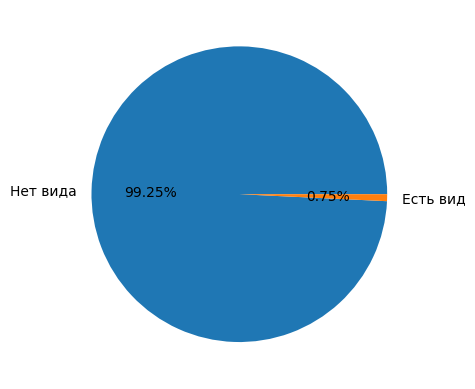

In [35]:
data = df["waterfront"].value_counts()

plt.pie(data.values, labels=["Нет вида", "Есть вид"], autopct="%1.2f%%");

Из данной круговой диаграммы распределения домов от наличия вида на набережную можно сделать вывод, что около 0.75% от всех участков имеют вид на море.

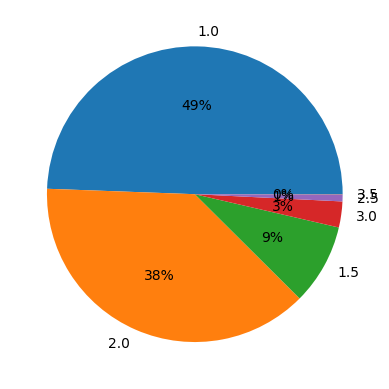

In [45]:
data = df["floors"].value_counts()

plt.pie(data.values, labels=data.index, autopct="%1.0f%%");

Из данной гистограммы распределения этажей можно сделать вывод, что преобладают участки с одним (около 50%) и двумя (около 38%) этажами. Трехэтажных участков чуть больше 3%. Также имеются участки с цоколями или мансардами (около 10%).

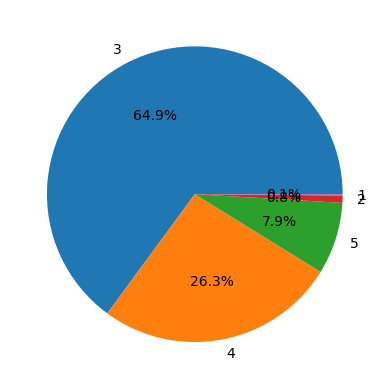

In [43]:
data = df["condition"].value_counts()

plt.pie(data.values, labels=data.index, autopct="%1.1f%%");

Из данной гистограммы состояние домов можно сделать вывод, что около 65% участков имеют рейтинг "3". Чуть больше 26% участков оценили на "4". А также около 8% участков имеют наивысшую оценку. Помимо этого есть около 1% участков с плохим и ужасным рейтингом.

ЗАДАЧА 3

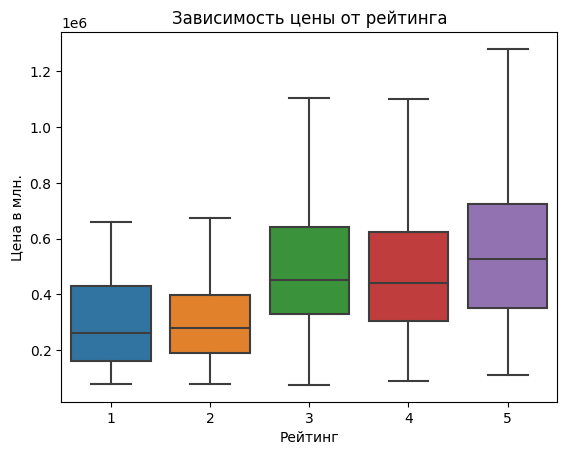

In [83]:
import seaborn as sns
sns.boxplot(x="condition", y="price", data=df, showfliers=False).set(xlabel='Рейтинг', ylabel='Цена в млн.', title='Зависимость цены от рейтинга');


Из данного графика зависимости стоимости участка от рейтинга можно сделать вывод, что средняя цена, за которую можно купить жилье варьируется от 300 тыс. до 700 тыс. Жилье с низким рейтингом в среднем стоит дешевле - от 200 тыс. до 400 тыс.

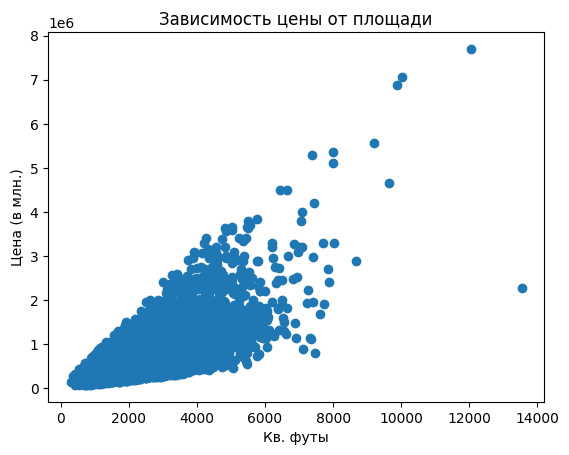

In [75]:
plt.scatter(x=df['sqft_living'], y=df['price'])
plt.xlabel("Кв. футы")
plt.ylabel("Цена (в млн.)")
plt.title("Зависимость цены от площади");

Из данной диаграммы зависимости стоимости участка от квадратуры можно сделать вывод, что основное количество участков имеет площадь не более 6000 кв.футов, а стоят не дороже 3 млн. Зависимость линейная.

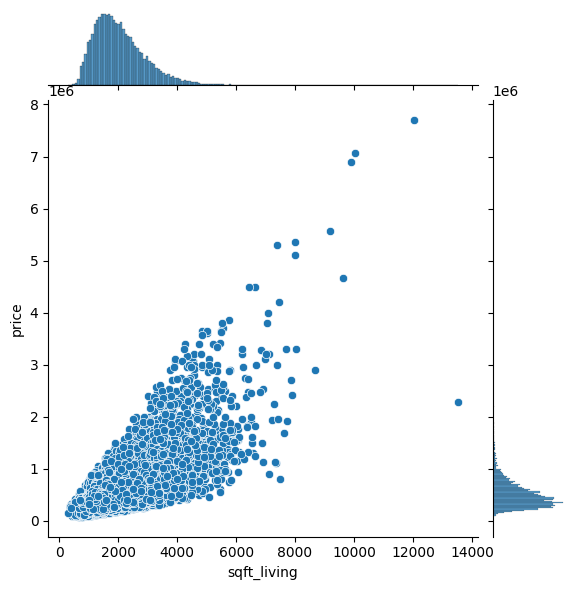

In [90]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='scatter');

Используя график JoinPlot можно более нагляднее увидеть распределение зависимости цены от квадратуры. Большую часть участков площадью от 1000 до 3000 кв. футов можно приобрести приблизительно за полмиллиона.

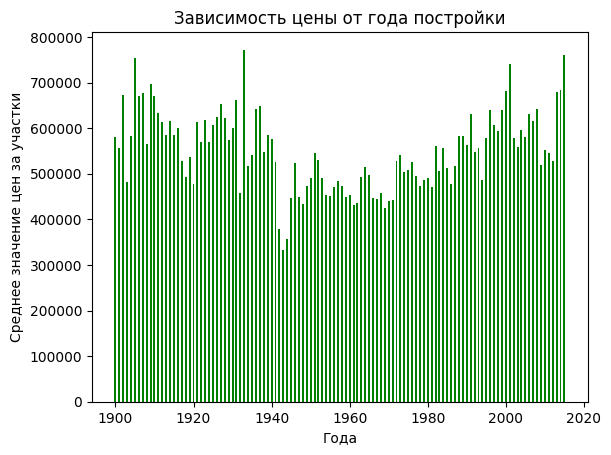

In [110]:
data = df

data['yr_built'] = pd.to_datetime(data['yr_built'], format='%Y')

# Группировка данных по году постройки и вычисление суммы стоимости участков
sum_by_year = data.groupby(data['yr_built'].dt.year)['price'].mean()

# Создание нового DataFrame с суммой стоимости участков в каждом году
bar_data = pd.DataFrame({'Year': sum_by_year.index, 'Total Price': sum_by_year.values})

# Вывод полученного DataFrame
plt.bar(bar_data["Year"], bar_data["Total Price"], color ='green', width = 0.5)
 
plt.xlabel("Года")
plt.ylabel("Среднее значение цен за участки")
plt.title("Зависимость цены от года постройки");

Из данной диаграммы зависимости стоимости участка от года постройки можно сделать вывод, что дома построенные в довоенное время в среднем ценятся так же (от 5 до 7 млн) как и дома, построенные начиная с 90-х годов XX-века.

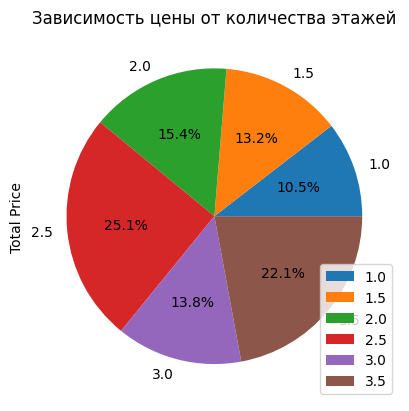

In [135]:
sum_by_floors = df.groupby('floors')['price'].mean()

# Создание нового DataFrame с суммой стоимости участков для каждого количества этажей
pie_data = pd.DataFrame({'Floors': sum_by_floors.index, 'Total Price': sum_by_floors.values})
pie_data['Floors'] = pie_data['Floors'].astype(str)
pie_data.set_index('Floors', inplace=True)

# Отображение DataFrame в виде круговой диаграммы
pie_data.plot(kind='pie', y='Total Price', autopct='%1.1f%%')
plt.title('Зависимость цены от количества этажей');

Из данной диаграммы зависимости стоимости участка от количества этажей можно сделать вывод, что в среднем дома с цокольными и мансардными этажами стоят на 10% дороже, чем дома без них. дешевле всего можно приобрести одноэтажные дома.